In [2]:
# Regression (회귀)
# 숫자값 예측이 목적
# 주택에 대한 정보 (방의 개수, 크기, 욕실 수 등) -> 주택의 판매 가격
# 이미지에서 어떤 항목의 경계 상자의 좌료를 예측
# 인구 통계 (연령, 성별, 인종 등) -> 의료보험 비용 등등 예측

# 입력 (데이터) -> 패턴을 발견하는 신경망 -> 출력 (예측)
# 1. 분석하기 쉬운 형태로 데이터를 준비
# 2. 패턴을 발견하는 신경망을 만들기
# 3. 만든 신경망의 결과를 확인 

In [ ]:
# 앞으로 우리가 할 일
# 1. 회귀 모델의 아키텍처를 확인
# 2. 입력과 출력의 형태를 생성
#     - 'X' : feature / 데이터 (입력)
#     - 'Y' : 레이블 (Lable) (출력)
# 3. 모델링 단계
#      1) 모델 생성
#      2) 모델 컴파일
#          - 손실 함수 설정
#          - 최적화 함수 설정
#          - 평가 지표 생성
#      3) 모델 피팅 (데이터에서 패턴 찾기)
# 4. 모델 평가
#      1) 모델 시각화
#      2) 학습 곡선 확인
#      3) 예측 결과를 실제 데이터와 비교 (평가 지표 사용)
# 5. 모델 저장 (나중의 사용을 위해서)
# 6. 모델 가져와서 사용하기

## 회귀 신경망의 일반적인 아키텍처

신경망을 생성하는 방법은 매우 다양합니다. 그래도, 일반적인 방법을 존재

데이터 수집 -> 데이터에서 패턴 찾기 -> 결과 만들기

* Input Layer shape (입력층의 형태) : 특성 (feature, column, variable)의 갯수 (shape)
* Hidden Layer (은닉층) : 해결하려는 문제에 따라 최소 1개 이상으로 이루어진다.
* 은닉층 각각을 구성하는 뉴런 : 해결하려는 문제에 따라 최소 10 ~ 최대 100로 이루어진다.
* Output Leayer shape (출력층의 형태) : 우리가 예측값을 얻고자 하는 형태 (주택의 가격이라면 1)
* 은닉층의 활성화 함수 : [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit)
* 출력층의 활성화 함수 : None, ReLU, logistic/tanh
* 손실함수 : MSE (mean square error), MAE (mean absolute error) / Huber (MAE와 MSE의 조합) 특이값들이 있을 때 사용
* 옵티마이저 (최적화) : SGD (stochastic gradient descent), Adam


* **hyperparameter** *(하이퍼파라미터)* : 머신 러닝 분야에서 하이퍼파라미터라는 단어는 데이터 분석가나 개발자들이 설정하는 값
* **parameter** *(파라미터)* : (분석가나 개발자들이 명시적으로 설정한 값이 아닌) 모델이 스스로 파악한 값 

## 이제 우리는 **regression problem (회귀 문제)**를 다룹니다!
회귀 --> 특정 값을 예측!

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

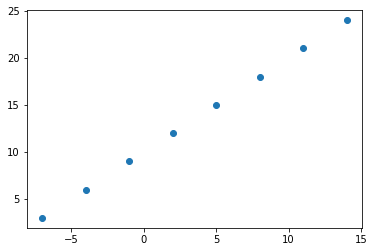

In [2]:
# feature 특성, 변수
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

모델을 만들기전에 EDA (Explorary Data Analysis) 탐색적 자료 분석을 해서

위의 경우처럼 X, y의 관계, 즉 패턴을 찾을려고 한다!

위의 패턴이라면 17은 어떤 값일까? -10은 어떤 값일까?

## 신경망 (neural network)로 작업을 할 때 가장 중요한 몇 가지 개념!

### **input shape (입력 모양)** : 모델을 만들기 위한 데이터의 형태
### **output shape (출력 모양)** : 모델을 통해서 예측하고자 하는 데이터의 형태

문제에 따라 입려과 출력의 모양 각기 각각!

신경망은 숫자를 입력 받고, 숫자를 출력! 이 때 일반적으로 tensor나 array로 처리합니다.

In [6]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [7]:
house_info.shape

TensorShape([3])

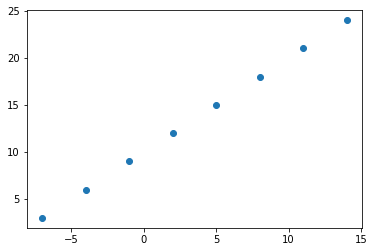

In [3]:
# feature 특성, 변수
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Label
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [6]:
input_shape = X.shape
output_shape = y.shape

input_shape, type(input_shape), X.ndim, output_shape, type(output_shape), y.ndim 

(TensorShape([8]),
 tensorflow.python.framework.tensor_shape.TensorShape,
 1,
 TensorShape([8]),
 tensorflow.python.framework.tensor_shape.TensorShape,
 1)

In [12]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

## 모델링 과정
### 현재 우리가 알고 있는 데이터, 입력의 shape, 출력의 shape
Tensorflow에서는 일반적으로 모델을 생성하고 학습할 때 3단계를 실행

1. **모델 정의** : 우리가 직접 신경망 (neural network)를 구성하는 레이어를 정의하거나 (전이학습시) 이전에 만들어 놓은 모델을 불어온다 
2. **모델 컴파일** : 모델이 어떻게 실행될지 정의, 측정값 (손실함수,metric)와 개선을 하는 방법 (optimizer)
3. **모델 피팅** : 데이터에서 패턴을 찾도록 모델에게 일을 시킴 (X가 어떻게 y가 될까?)

In [7]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 387ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
model.predict([17.0, -10.])

array([[12.716021],
       [-7.4006  ]], dtype=float32)

### 위 모델의 결과를 봤을 때, 간단히만 봐도 27.0을 예상했는데 전혀 다른 값을 얻었다.
### 뭔가 모델이 이상하다! 개선을 시켜야 겠다!

## 모델 개선시키기
현재까지 생성한 모델을 기반으로 개선을 시킨다라는 개념

1. **모델 정의 부분** : 레이어를 추가하거나, 레이어를 이루는 neuron 단위를 추가, 활성 함수를 변경
2. **모델 컴파일** : optimizer를 변경, 최적화 함수를 수행하는 learning rate를 변경
3. **모델 피팅** : epoch를 늘러주거나, 데이터 더 많이 준다

In [17]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model.fit(X, y, epochs = 200)

Epoch 1/200
1/1 [==============================] - 0s 328ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/200
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/200
1/1 [==============================] - 0s 4ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/200
1/1 [==============================] - 0s 3ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/200
1/1 [==============================] - 0s 2ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/200
1/1 [==============================] - 0s 2m

In [15]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
model.predict([17.0, -10.0]) # epoch 1000

array([[27.97857  ],
       [-4.4905186]], dtype=float32)

In [18]:
model.predict([17.0, -10.0]) # epoch 200


array([[ 30.908516],
       [-15.668092]], dtype=float32)

In [19]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [20]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [21]:
# 원래 X, y의 관계 y = X + 10의 관계
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [22]:
len(X), len(y)

(50, 50)

In [23]:
# 보통 학습 및 테스트 데이터를 나눌 때 80:20의 비율을 사용
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

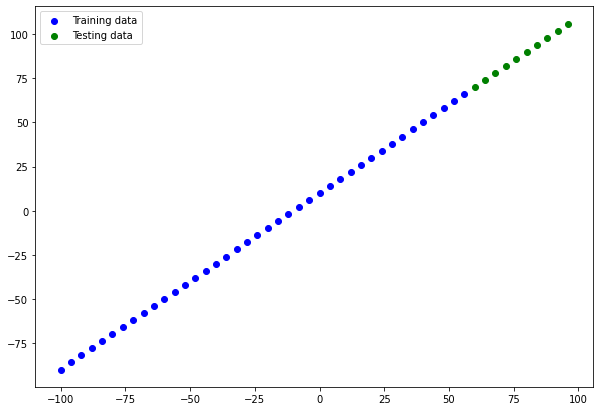

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()

In [25]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model.fit(X, y, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 5ms/step

In [26]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


**Total params** : 모델에 존재하는 파라이터의 총 갯수
**Trainable params** : 모델이 학습을 하면서 최신화할 수 있는 파라미터
**Non-trainble params** : 모델이 학습을 하면서 최신화할 수 없는 파라미터

In [59]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

In [60]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(X, y, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 6ms/step

In [62]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


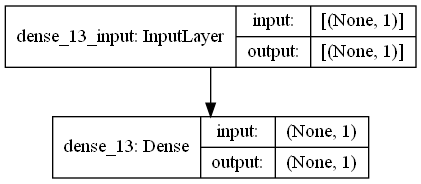

In [63]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [64]:
y_predicts = model.predict(X_test)
y_predicts

array([[54.771538],
       [58.317333],
       [61.86313 ],
       [65.40893 ],
       [68.95472 ],
       [72.50052 ],
       [76.04631 ],
       [79.59211 ],
       [83.13791 ],
       [86.6837  ]], dtype=float32)

In [65]:
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    prediction = y_predicts
):
    plt.figure(figsize = (10, 7))
    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, prediction, c="r", label="Predictions")
    plt.legend()

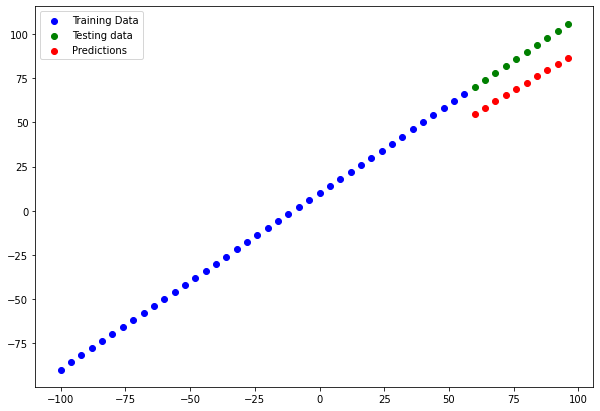

In [66]:
plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    prediction = y_predicts
)

### 모델의 결과를 시각화하는 것도 중요하지만 metric을 확인하는도 모델을 평가하는데 도움이 된다

In [67]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 108ms/step - loss: 17.2724 - mae: 17.2724


[17.272380828857422, 17.272380828857422]

## regression(회귀) 문제에서 주로 많이 사용하는 지표 2가지
**1. Mean absolute error (MAE)** : 실제값과 예측값의 차이의 평균

**2. Mean squared error (MSE)** : 실제값과 예측값의 차이의 제곱의 평균

tensorflow의 model.evaluate()는 모델의 손실 함수의 값 뿐만 아니라 metric까지 반환해준다!

In [69]:
mae = tf.metrics.mean_absolute_error(
    y_true = y_test,
    y_pred = y_predicts
)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33.228462, 29.682667, 26.136871, 22.591072, 19.04528 , 15.999585,
       13.572214, 11.763156, 10.572418, 10.      ], dtype=float32)>

In [70]:
y_test, y_predicts

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([[54.771538],
        [58.317333],
        [61.86313 ],
        [65.40893 ],
        [68.95472 ],
        [72.50052 ],
        [76.04631 ],
        [79.59211 ],
        [83.13791 ],
        [86.6837  ]], dtype=float32))

In [71]:
y_test.shape, y_predicts.shape

((10,), (10, 1))

In [72]:
y_predicts.squeeze().shape

(10,)

In [73]:
y_test, y_predicts.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([54.771538, 58.317333, 61.86313 , 65.40893 , 68.95472 , 72.50052 ,
        76.04631 , 79.59211 , 83.13791 , 86.6837  ], dtype=float32))

In [74]:
y_test.shape, y_predicts.squeeze().shape

((10,), (10,))

In [75]:
# MAE 구하기
mae = tf.metrics.mean_absolute_error(
    y_true = y_test,
    y_pred = y_predicts.squeeze()
)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=17.27238>

In [76]:
# MSE 구하기
mse = tf.metrics.mean_squared_error(
    y_true = y_test,
    y_pred = y_predicts.squeeze()
)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=300.0371>

In [77]:
tf.reduce_mean(tf.abs(y_test - y_predicts.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=17.272380447387697>

In [78]:
def mae(y_test, y_predicts):
    return tf.metrics.mean_absolute_error(y_test, y_predicts)

def mse(y_test, y_predicts):
    return tf.metrics.mean_squared_error(y_test, y_predicts)

## 모델이 평가한 예측도 살펴보고, metric도 평가해 본 후에 우리는 개선하기를 원합니다.

### 개선시 주로 활용할 수 있는 3가지 방법
**1. 더 많은 데이터** : 모델이 학습할 데이터를 주면 줄 수록 모델이 패턴을 찾을 기회는 많아진다

**2. 모델을 더 확장 (좀더 고급 모델로 만든다)** : 레이어를 추가하거나, 각 레이어를 이루는 neuron의 갯수를 조정

**3. 더 오래 학습을 한다** : 데이터 숨겨진 패턴을 찾는 더 많은 기회를 얻을 수 있다

## 실습용 모델 3개 만들 예정
1. model_1 : 원래 모델 그대로 사용 : layer 1개, epoch : 100
2. model_2 : layer 2개, epoch : 100
3. model_3 : layer 2개, epoch : 500

## model_1 생성

In [80]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 997us/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step -

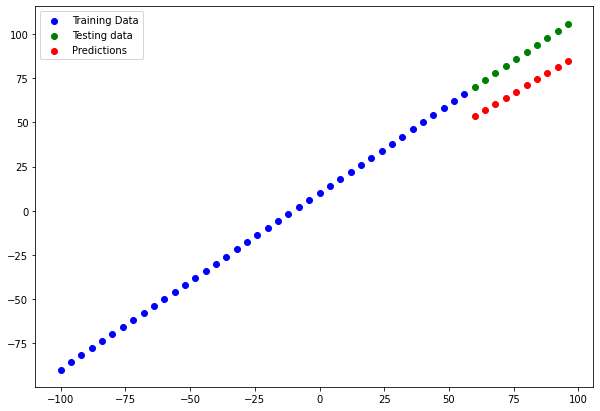

In [84]:
y_predicts_1 = model_1.predict(X_test)
plot_predictions(prediction = y_predicts_1)

In [86]:
mae_1 = mae(y_test, y_predicts_1.squeeze()).numpy()
mse_1 = mse(y_test, y_predicts_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

## model_2 생성

In [87]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model_2.fit(X_train, y_train, epochs=100, verbose=0)

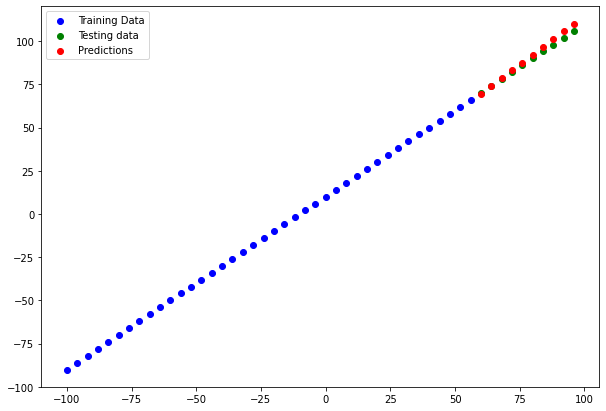

In [88]:
y_predicts_2 = model_2.predict(X_test)
plot_predictions(prediction = y_predicts_2)

In [89]:
mae_2 = mae(y_test, y_predicts_2.squeeze()).numpy()
mse_2 = mse(y_test, y_predicts_2.squeeze()).numpy()
mae_2, mse_2

(1.9097328, 5.45877)

## model_3 생성

In [109]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model_3.fit(X_train, y_train, epochs=5000, verbose=0)

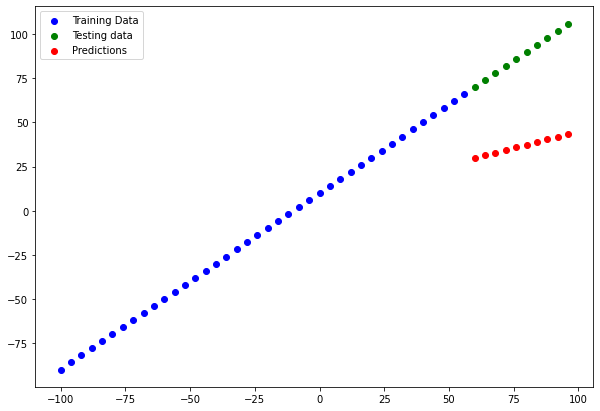

In [110]:
y_predicts_3 = model_3.predict(X_test)
plot_predictions(prediction = y_predicts_3)

In [111]:
mae_3 = mae(y_test, y_predicts_3.squeeze()).numpy()
mse_3 = mse(y_test, y_predicts_3.squeeze()).numpy()
mae_3, mse_3

(51.438873, 2697.3755)

In [107]:
model_results = [
    ["model_1", mae_1, mse_1],
    ["model_2", mae_2, mse_2],
    ["model_3", mae_3, mse_3],
]
model_results

[['model_1', 18.745327, 353.57336],
 ['model_2', 1.9097328, 5.45877],
 ['model_3', 8.614498, 75.60722]]

In [108]:
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909733,5.458770
2,model_3,8.614498,75.607224


### 위의 결과를 보면 model_2가 가장 좋은 결과를 얻는다는 것을 알 수 있다.
### 이런 과정이 머신 러닝 모델링 과정이며, 이런 여러가지 조합을 해보고 최고의 성능내는 조합을 선택하는 과정 

## 우리의 목표는 예측과 실제값의 차이를 줄이는 것이 목표
## 실험을 하면 할 수록, 무엇이 잘 안 되고 무엇인 잘 되는지 알 수 있습니다.
## 실험 실험 실험

## 현재까지 고생해서
### 모델을 학습시키고
### 가장 좋은 결과를 낼 수 있도록 모델을 튜닝했고
### 이제 우리는 그 모델을 저장해야 합니다! 왜? 나중에 사용하고! 어디에? 웹 애플리케이션이나 모바일 장비 등등
---
**model.save()**를 사용합니다

**Tensorflow**에서 (모델을 저장하는 방법)[https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format]

1. SavedModel 형식 (default) : 대부분의 경우 이 형식을 사용합니다.

2. HDF5 형식



In [112]:
# SavedModel 형식
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [115]:
# HDF5 형식
model_2.save("best_model_HDF5_format.h5")

## 저장된 모델을 불러와서 활용!
load_model()

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.arange(-100, 100, 4)
y = np.arange(-90, 110, 4)

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [7]:
def mae(y_test, y_predicts):
    return tf.metrics.mean_absolute_error(y_test, y_predicts)

def mse(y_test, y_predicts):
    return tf.metrics.mean_squared_error(y_test, y_predicts)

In [13]:
# SaveModel 형식의 모델을 불러오기
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_2_predicts_saved_model = loaded_saved_model.predict(X_test)
model_2_predicts_saved_model

array([[ 69.467125],
       [ 73.9856  ],
       [ 78.50408 ],
       [ 83.02256 ],
       [ 87.54104 ],
       [ 92.05952 ],
       [ 96.577995],
       [101.09647 ],
       [105.61495 ],
       [110.13344 ]], dtype=float32)

In [17]:
mae(y_test, model_2_predicts_saved_model.squeeze()).numpy(), mse(y_test, model_2_predicts_saved_model.squeeze()).numpy()

(1.9097328, 5.45877)

In [18]:
# HDF5 형식의 모델을 불러오기
loaded_saved_model_h5 = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_saved_model_h5.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_2_predicts_h5 = loaded_saved_model_h5.predict(X_test)
model_2_predicts_h5

array([[ 69.467125],
       [ 73.9856  ],
       [ 78.50408 ],
       [ 83.02256 ],
       [ 87.54104 ],
       [ 92.05952 ],
       [ 96.577995],
       [101.09647 ],
       [105.61495 ],
       [110.13344 ]], dtype=float32)

In [20]:
mae(y_test, model_2_predicts_h5.squeeze()).numpy(), mse(y_test, model_2_predicts_h5.squeeze()).numpy()

(1.9097328, 5.45877)

In [21]:
mae(y_test, model_2_predicts_saved_model.squeeze()).numpy(), mse(y_test, model_2_predicts_saved_model.squeeze()).numpy(), mae(y_test, model_2_predicts_h5.squeeze()).numpy(), mse(y_test, model_2_predicts_h5.squeeze()).numpy()

(1.9097328, 5.45877, 1.9097328, 5.45877)